## Objective

+ To cover as much as possible thoroughly, making sure everyone here gets the idea.
+ To make sure that everyone goes back thinking that Data and Predictive skills are easy to learn and master, if the correct process is followed.
+ Demonstrate Data Science Process using an example hackathon problem.
+ Attempted to make it intuitive and interpretable.
+ Get feedback on my work from the ones who have already done this type of problems.
+ Present a few machine learning techniques.
+ Encourage audience to participate in hackathons.
+ For me to get practice presenting my work.

### How to make the best use of this presentation

+ Look at pictures thoroughly, while actively listening.
+ Do not bother about what is written, it is going to be shared.

### McKinsey Hackathon on Stroke Probability Prediction

***A Solution by Aparna C Shastry ***

Dated April 14-15th GMT 00:00 (24 hr duration hackathon)

[GitHub](https://github.com/aparnack/data_science)       
[Twitter](https://twitter.com/aparsha2303)         
[LinkedIn](https://www.linkedin.com/in/aparnacshastry/)        
[Email](mailto:aparnashastrymls@gmail.com)        
[Medium](https://medium.com/@aparnack)


### Problem Statement
Your Client, a chain of hospitals aiming to create the next generation of healthcare for its patients, has retained McKinsey to help achieve its vision. The company brings the best doctors and enables them to provide proactive health care for its patients. One such investment is a Center of Data Science Excellence.

 

In this case, your client wants to have study around one of the critical disease "Stroke". Stroke is a disease that affects the arteries leading to and within the brain. A stroke occurs when a blood vessel that carries oxygen and nutrients to the brain is either blocked by a clot or bursts (or ruptures). When that happens, part of the brain cannot get the blood (and oxygen) it needs, so it and brain cells die.

 

Over the last few years, the Client has captured several health, demographic and lifestyle details about its patients. This includes details such as age and gender, along with several health parameters (e.g. hypertension, body mass index) and lifestyle related variables (e.g. smoking status, occupation type).

 

The Client wants you to predict the probability of stroke happening to their patients. This will help doctors take proactive health measures for these patients.

#### Evaluation Metric

It is AUC-ROC

#### Public and Private Split
Test data is further randomly divided into Public (30%) and Private (70%) data.

+ Your initial responses will be checked and scored on the Public data.
+ The final rankings would be based on your private score which will be published once the competition is over.

### My Solution

Before doing any coding, let us note these 
#### Bias in the data:

Our models and predictions are only as good as the data. Commonsense and Critical thinking are the keys to understand it thoroughly before doing modeling.
**In this data I could think of mainly three types of biases:** The first two themselves are a little hard to distinguish in some cases. Selection Bias can occur due to surviving (but not vice versa)

+ **Survivorship Bias**: Survivorship bias is a classic thinking fallacy where you learn lessons only from successful outcomes because the failures are often invisible. In this problem, people who are dead due to stroke or a combination of stroke and some other disease may not be in the dataset, no information is given.
<img src=starbucks_arrest.jpg>     

A more serious example is from [worldwar II aircraft study](http://clearthinking.co/survivorship-bias/) 
In this dataset, it is not clearly stated if the people are living or dead. From problem definition, it seems like it consists of people who are alive.

+ **Selection Bias**: Selection bias is a distortion in a measure of association (such as a risk ratio) due to a sample selection that does not accurately reflect the target population. 
<img src=selection-bias_example.gif>     

This bias is a part of almost any sampling, because aim of sampling itself is to study the unknowns. Hence how are we ever sure that we considered all random combinations of these unknowns? In this particular problem, survivorship bias has implied one kind of selection bias as well. Selection bias is also there because the hospital is visited more often by sick people, and the dataset is biased to represent sick people than healthy people. 

+ **Confounding Bias**: A situation in which the effect or association between an exposure and outcome is distorted by the presence of another variable.
<img src=confounding_bias-example.jpg>    

In this dataset, age is found to be the most determinant factor, after studying. Smoking is confounding factor, because it is also age dependent, and medicallly it improves chances of stroke. Now, there are a few ways to handle it. Some of them are beyond the scope of this presentation, as this is not so commonly heard term and hence some of us might have heard it the first time.

### Studying the attributes:

+ [This](https://www.mayoclinic.org/diseases-conditions/stroke/symptoms-causes/syc-20350113) article is from mayoclinic on stroke, risk factors, lifestyle factors affecting etc. It covers most features present in this dataset, such as age, gender, hypertension, heart disease, glucose level(article talks diabetes), bmi(article talks about overweight/obese) and smoking status. There is a possibility for feature engineering based on the domain knowledge derived through this.
+ One should examine, ever_married, residence type, work type separately. Work type is partially addressed above because it says exercising reduces the risk of stroke. However, we do not have sufficient info in the work type to conclude whether work includes physical exercise or not.
+ ever_married: Although not from reliable source, I found [this](https://www.today.com/health/odds-surviving-after-stroke-better-if-you-re-married-t106002) article on odds of survival after stroke if you are married. But commonsense says that being married might motivate one to keep a better lifestyle, yet this seems like a weak feature.
+ Residence_type: There is no medical evidence on this. This may not have direct impact on stroke, but might help in imputation of missing values
+ work_type: never worked might mean lack of exercise? Can not say. We need to see how it can be used later.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 7
import time
import statsmodels.api as sm

C:\Users\Aparn\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
train = pd.read_csv('train_ajEneEa.csv')
test = pd.read_csv('test_v2akXPA.csv')

### Inspect the DataFrames

In [3]:
train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [4]:
# Inspect train set
print ("Length of train rows:", len(train))
inspect_train = pd.DataFrame({'Dtype': train.dtypes, 'Unique values': train.nunique() ,
             'Number of Missing values': train.isnull().sum() ,
              'Percentage Missing': (train.isnull().sum() / len(train)) * 100
             }).sort_values(by='Number of Missing values',ascending = False)
inspect_train

Length of train rows: 43400


,Dtype,Number of Missing values,Percentage Missing,Unique values
smoking_status,object,13292,30.626728,3
bmi,float64,1462,3.368664,555
id,int64,0,0.000000,43400
gender,object,0,0.000000,3
age,float64,0,0.000000,104
hypertension,int64,0,0.000000,2
heart_disease,int64,0,0.000000,2
ever_married,object,0,0.000000,2
work_type,object,0,0.000000,5
Residence_type,object,0,0.000000,2


BMI and smoking status have missing values

In [5]:
# Inspect test set
print ("Length of test rows:", len(test))
inspect_test = pd.DataFrame({'Dtype': test.dtypes, 'Unique values': test.nunique() ,
             'Number of Missing values': test.isnull().sum() ,
              'Percentage Missing': (test.isnull().sum() / len(test)) * 100
             }).sort_values(by='Number of Missing values',ascending = False)
inspect_test

Length of test rows: 18601


,Dtype,Number of Missing values,Percentage Missing,Unique values
smoking_status,object,5751,30.917693,3
bmi,float64,591,3.177249,500
id,int64,0,0.000000,18601
gender,object,0,0.000000,3
age,float64,0,0.000000,104
hypertension,int64,0,0.000000,2
heart_disease,int64,0,0.000000,2
ever_married,object,0,0.000000,2
work_type,object,0,0.000000,5
Residence_type,object,0,0.000000,2


In [6]:
# Check unique values of the qualitative(categorical) variables with more than 2 categories
print("Gender unique train and test:",train.gender.unique(),test.gender.unique())
print("Work type unique train and test:",train.work_type.unique(),test.work_type.unique())
print("Smoking status unique train and test:",train.smoking_status.unique(),test.smoking_status.unique())

Gender unique train and test: ['Male' 'Female' 'Other'] ['Male' 'Female' 'Other']
Work type unique train and test: ['children' 'Private' 'Never_worked' 'Self-employed' 'Govt_job'] ['Private' 'Self-employed' 'children' 'Govt_job' 'Never_worked']
Smoking status unique train and test: [nan 'never smoked' 'formerly smoked' 'smokes'] ['formerly smoked' nan 'never smoked' 'smokes']


0    0.981959
1    0.018041
Name: stroke, dtype: float64

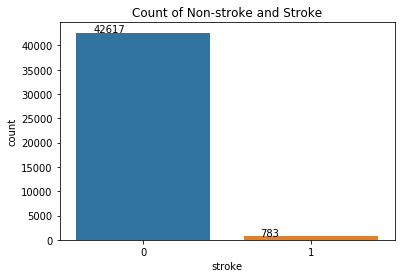

In [7]:
# check the percentage stroke and non stroke. Also plot a countplot
ax = sns.countplot(train['stroke'])
plt.title('Count of Non-stroke and Stroke')
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
train.stroke.value_counts()/train.stroke.count()

In [8]:
test['stroke'] = 0

### 1. Data Cleaning and Exploratory Data Analysis (EDA)

In [9]:
data = pd.concat([train, test]) #concatenate both dataframes prior to EDA. I am still debating within myself if EDA should be done on both or only on Train
target = data['stroke']  #target variable
data = data.drop('stroke',axis=1)
df = data.copy()

In [10]:
# let's break down the columns by their type (i.e. int64, float64, object)
data.columns.to_series().groupby(data.dtypes).groups

{dtype('int64'): Index(['id', 'hypertension', 'heart_disease'], dtype='object'),
 dtype('float64'): Index(['age', 'avg_glucose_level', 'bmi'], dtype='object'),
 dtype('O'): Index(['gender', 'ever_married', 'work_type', 'Residence_type',
        'smoking_status'],
       dtype='object')}

In [11]:
# Inspect alldata set
print ("Length of alldata rows:", len(data))
inspect_alldata = pd.DataFrame({'Dtype': data.dtypes, 'Unique values': data.nunique() ,
             'Number of Missing values': data.isnull().sum() ,
              'Percentage Missing': (data.isnull().sum() / len(data)) * 100
             }).sort_values(by='Number of Missing values',ascending = False)
inspect_alldata

Length of alldata rows: 62001


,Dtype,Number of Missing values,Percentage Missing,Unique values
smoking_status,object,19043,30.714021,3
bmi,float64,2053,3.311237,582
id,int64,0,0.000000,62001
gender,object,0,0.000000,3
age,float64,0,0.000000,104
hypertension,int64,0,0.000000,2
heart_disease,int64,0,0.000000,2
ever_married,object,0,0.000000,2
work_type,object,0,0.000000,5
Residence_type,object,0,0.000000,2


**Remarks:** As per the Mayoclinic article, smoking is an important determinant. 30% missing values are significant. Let us examine them by age range

##### Smoking Status

In [12]:
print("Number of people below age 10:",data.loc[data.age < 10,'age'].count())
print("Number of smoking status entries in that range:",data.loc[data.age < 10,'smoking_status'].nunique())

Number of people below age 10: 6157
Number of smoking status entries in that range: 0


Number of people in age range 10-19: 6058
Number of smoking status entries in that range: 3
never smoked       0.783738
formerly smoked    0.129217
smokes             0.087045
Name: smoking_status, dtype: float64
Number of people in age > 19: 49786
Number of smoking status entries in that range: 3


never smoked       0.514152
formerly smoked    0.259289
smokes             0.226559
Name: smoking_status, dtype: float64

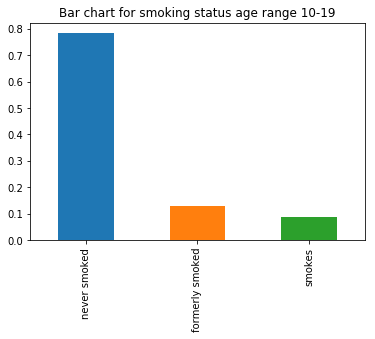

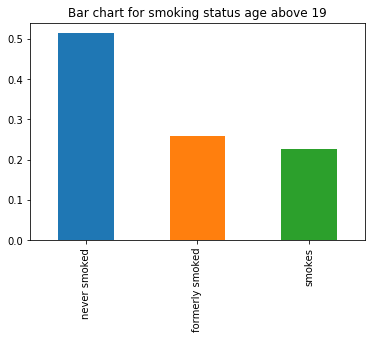

In [13]:
print("Number of people in age range 10-19:",data.loc[data.age.isin(range(10,20)),'age'].count())
print("Number of smoking status entries in that range:",data.loc[data.age.isin(range(10,20)),'smoking_status'].nunique())
_ = (data.loc[data.age.isin(range(10,20)),'smoking_status'].value_counts()/data.loc[data.age.isin(range(10,20)),'smoking_status'].count()).plot.bar()
_ = plt.title("Bar chart for smoking status age range 10-19")
print(data.loc[data.age.isin(range(10,20)),'smoking_status'].value_counts()/data.loc[data.age.isin(range(10,20)),'smoking_status'].count())
print("Number of people in age > 19:",data.loc[data.age > 19,'age'].count())
print("Number of smoking status entries in that range:",data.loc[data.age > 19,'smoking_status'].nunique())
_ = plt.figure()
_ = (data.loc[data.age > 19,'smoking_status'].value_counts()/data.loc[data.age > 19,'smoking_status'].count()).plot.bar()
_ = plt.title("Bar chart for smoking status age above 19")
data.loc[data.age > 19,'smoking_status'].value_counts()/data.loc[data.age > 19,'smoking_status'].count()

+ Above bar charts how the fraction of three different smoking status vary in two different age ranges.    
+ Safely replace smoking status of all kids below age 10 with never smoked. It reduces missing values by ~33% of total missing  
+ Even the ages 10-19 have more number of never smoked than the other two. One of the simple imputation (meaning replacing missing data values) methods is to replace by the value with highest frequency. This reduces missing values by another 33%. 
+ Rest of them can be left as they are. They are handled by one hot encoding later.

In [14]:
data.loc[data.age < 20,'smoking_status'] = 'never smoked'
train.loc[train.age < 20,'smoking_status'] = 'never smoked'
test.loc[test.age < 20,'smoking_status'] = 'never smoked'

##### Avg Glucose Level 

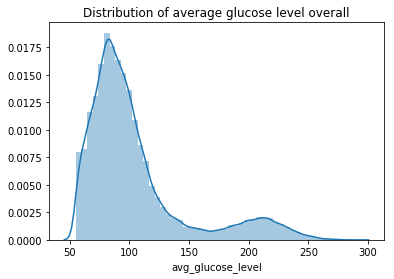

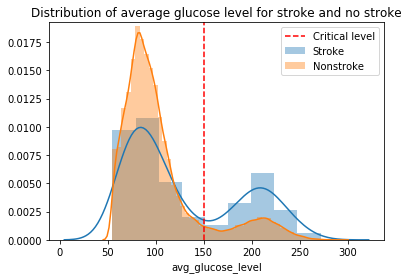

In [15]:
sns.distplot(train.avg_glucose_level)
plt.title('Distribution of average glucose level overall')
plt.figure()
sns.distplot(train[train.stroke==1].avg_glucose_level)
plt.title('Distribution of average glucose level for stroke and no stroke')
sns.distplot(train[train.stroke==0].avg_glucose_level)
plt.axvline(150,linestyle='--',color='r')
plt.legend(['Critical level','Stroke','Nonstroke'])

**First Plot**: Drawn to understand the overall distribution

**Second plot**   
Diabetese definition: Avg glucose level above 180 after 2 hours of meal is diabetese. In the plot above, it seems like after 150, the curves are diverging.
This is a distinguishing feature. It was worthwhile to think of making it more distinguishing by taking square and adding it as feature. It did not result in any improvement in public leaderboard score, hence found it risky to keep. 

##### Age

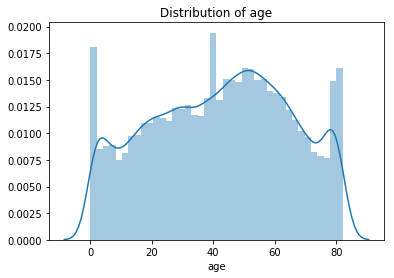

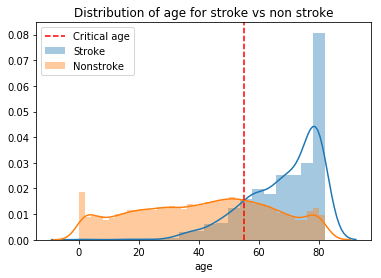

In [16]:
_ = sns.distplot(train.age)
_ = plt.title('Distribution of age')
_ = plt.figure()
_ = sns.distplot(train[train.stroke==1].age)
_ = sns.distplot(train[train.stroke==0].age)
_ = plt.axvline(55,linestyle='--',color='r')
_ = plt.title('Distribution of age for stroke vs non stroke')
_ = plt.legend(['Critical age','Stroke','Nonstroke'])

**First Plot**: Done to see the overall distribution of age in data set. Except spikes at age < 5, around 40 and at 70 and above, other ages are uniformly distributed more or less.

**Second Plot:** 
+ The mayoclinic article mentions that people above age 55 are at higher stroke risk and the point at which both distributions meet is exactly that!
+ The distributions have overlaps from 40 to 80. However, we are interested in probabilities and other features will help in distinguishing the two groups.
+ The odds of having stokes shoots up around age 70 to 80

In [17]:
print("Number of people below 30 who had stroke:",train.loc[train.age.isin(range(10,31)),:].groupby('stroke').id.count())
print("probability: ",1/9951)
train.loc[train.age.isin(range(10,31)),:].groupby('stroke').mean()

Number of people below 30 who had stroke: stroke
0    9948
1       3
Name: id, dtype: int64
probability:  0.00010049241282283188


,id,age,hypertension,heart_disease,avg_glucose_level,bmi
stroke,,,,,,
0,36368.488741,20.740450,0.006936,0.000503,93.640803,26.816101
1,53215.666667,21.333333,0.000000,0.000000,62.023333,28.300000


stroke  ever_married
0       Yes             21148
        No               2885
1       Yes               340
        No                 34
Name: ever_married, dtype: int64
Number of people above who had stroke: stroke
0    24033
1      374
Name: id, dtype: int64


,id,age,hypertension,heart_disease,avg_glucose_level,bmi
stroke,,,,,,
0,36564.294512,49.736612,0.112512,0.043315,107.016973,31.109426
1,37446.000000,58.371658,0.221925,0.192513,132.151658,31.743189


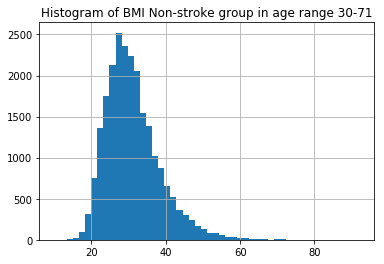

In [18]:
_ = train.loc[(train.age.isin(range(30,71))) & (train['stroke']==0),'bmi'].hist(bins=50)
_ = plt.title('Histogram of BMI Non-stroke group in age range 30-71')
print(train.loc[train.age.isin(range(30,71)),:].groupby('stroke').ever_married.value_counts())
print("Number of people above who had stroke:",train.loc[train.age.isin(range(30,71)),:].groupby('stroke').id.count())
train.loc[train.age.isin(range(30,71)),:].groupby('stroke').mean()

stroke  ever_married
0       Yes             4458
        No               419
1       Yes              362
        No                43
Name: ever_married, dtype: int64
Number of people above who had stroke: stroke
0    4877
1     405
Name: id, dtype: int64


,id,age,hypertension,heart_disease,avg_glucose_level,bmi
stroke,,,,,,
0,36041.503178,76.879639,0.224728,0.171417,119.863664,28.862533
1,35978.864198,77.679012,0.288889,0.259259,127.856963,28.217353


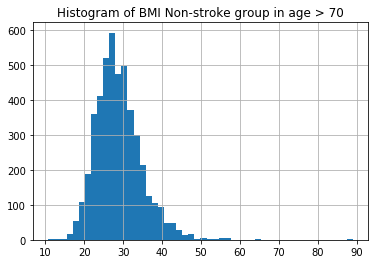

In [19]:
_ = train.loc[(train.age > 70) & (train['stroke']==0),'bmi'].hist(bins=50)
_ = plt.title('Histogram of BMI Non-stroke group in age > 70')
print(train.loc[train.age  > 70,:].groupby('stroke').ever_married.value_counts())
print("Number of people above who had stroke:",train.loc[train.age > 70,:].groupby('stroke').id.count())
train.loc[train.age > 70,:].groupby('stroke').mean()

Note a few important points:
1. 405 out of total observed cases 783 i.e. more than 50% stroke come from this age range
2. All the stroke patients have more hypertension, heart disease and avg glucose level.
3. Ever married is also age dependent, hence a confounding variable. But that is not having much influence on stroke.

##### BMI 

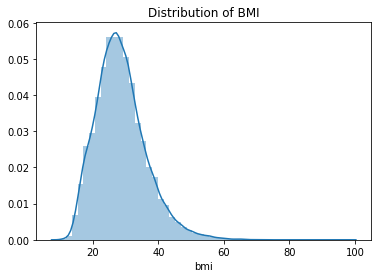

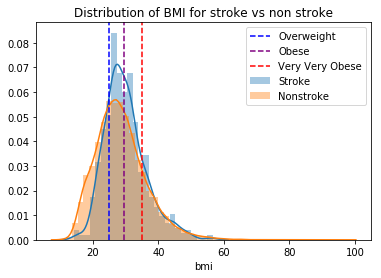

In [20]:
# With 3% missing values
_ = sns.distplot(train.bmi.dropna())
_ = plt.title('Distribution of BMI')
_ = plt.figure()
_ = sns.distplot(train[train.stroke==1].bmi.dropna())
_ = sns.distplot(train[train.stroke==0].bmi.dropna())
_ = plt.axvline(25,linestyle='--',color='b')
_ = plt.axvline(29.5,linestyle='--',color='purple')
_ = plt.axvline(35,linestyle='--',color='r')
_ = plt.title('Distribution of BMI for stroke vs non stroke')
_ = plt.legend(['Overweight','Obese','Very Very Obese','Stroke','Nonstroke'])

**Remarks:** The difference in distributions of stroke Vs Non stroke group is not that noticeable towards BMI > 35. This is because other factors take over. Again there is confounding bias effect. **Hence it is a fallacy to conclude from the above plot that being obese does not increase the chances of stroke.**

In [21]:
# let's list all the non-numerical columns from df_training
def conv_one_hot(data) :
    categorial_variables = data.select_dtypes(exclude=['int64', 'float64', 'bool']).columns
    print("The list of Categorical variables")
    print(list(categorial_variables))
    # Convert Categorical variables to dummies
    cat_var = pd.get_dummies(data[list(categorial_variables)],drop_first=True)
    # Remove originals
    data = data.drop(categorial_variables,axis=1)
    data = pd.concat([data,cat_var],axis=1)
    #removing dulpicate columns - useful in case two variables are closely related.
    _, i = np.unique(data.columns, return_index=True)  #Always better to have
    data=data.iloc[:, i] 
    return data

In [22]:
# This is the logical point to convert, because we need this for BMI imputation
data = conv_one_hot(data)
data.head()

The list of Categorical variables
['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


,Residence_type_Urban,age,avg_glucose_level,bmi,ever_married_Yes,gender_Male,gender_Other,heart_disease,hypertension,id,smoking_status_never smoked,smoking_status_smokes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,0,3.0,95.12,18.0,0,1,0,0,0,30669,1,0,0,0,0,1
1,1,58.0,87.96,39.2,1,1,0,0,1,30468,1,0,0,1,0,0
2,1,8.0,110.89,17.6,0,0,0,0,0,16523,1,0,0,1,0,0
3,0,70.0,69.04,35.9,1,0,0,0,0,56543,0,0,0,1,0,0
4,0,14.0,161.28,19.1,0,1,0,0,0,46136,1,0,1,0,0,0


In [23]:
perc_na = (data.isnull().sum()/len(data))*100
ratio_na = perc_na.sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :ratio_na})
missing_data

,Missing Ratio
bmi,3.311237
work_type_children,0.000000
work_type_Self-employed,0.000000
work_type_Private,0.000000
work_type_Never_worked,0.000000
smoking_status_smokes,0.000000
smoking_status_never smoked,0.000000
id,0.000000
hypertension,0.000000
heart_disease,0.000000


NaN in smoking have disappeared due to one hot encoding.     
How to fill missing values in BMI? For that let us see the distribution

count    59948.000000
mean        28.587099
std          7.766122
min         10.100000
25%         23.200000
50%         27.700000
75%         32.800000
max         97.600000
Name: bmi, dtype: float64

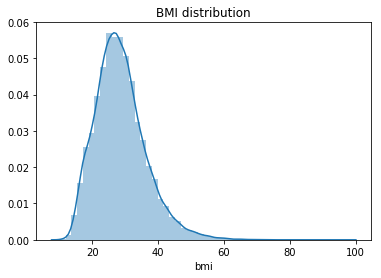

In [24]:
_ = sns.distplot(data.bmi.dropna())
_ = plt.title('BMI distribution')
data.bmi.describe()

In [25]:
missing_bmi_rows = data[data.bmi.isnull()]
missing_bmi_rows.head()

,Residence_type_Urban,age,avg_glucose_level,bmi,ever_married_Yes,gender_Male,gender_Other,heart_disease,hypertension,id,smoking_status_never smoked,smoking_status_smokes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
81,0,61.0,202.21,NaN,1,0,0,0,0,51676,1,0,0,0,1,0
95,1,34.0,106.23,NaN,1,1,0,1,0,31091,0,0,0,1,0,0
113,1,76.0,209.58,NaN,1,0,0,0,1,54312,1,0,0,0,1,0
186,0,63.0,79.92,NaN,1,0,0,0,0,11999,0,1,0,0,0,0
231,1,61.0,184.15,NaN,1,1,0,0,0,22470,0,0,0,0,0,0


How does it look with filling all of them with mean or median?

count    59948.000000
mean        28.587099
std          7.766122
min         10.100000
25%         23.200000
50%         27.700000
75%         32.800000
max         97.600000
Name: bmi, dtype: float64

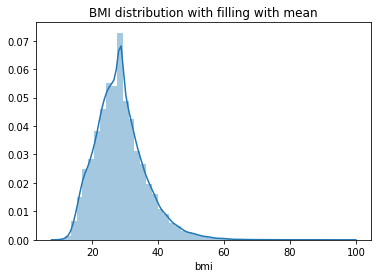

In [26]:
_ = sns.distplot(data.bmi.fillna(data.bmi.mean()))
_ = plt.title('BMI distribution with filling with mean')
data.bmi.describe()

The distribution is distorted in comparison with original.

In [27]:
# Check correlation of bmi with avg glucose level
valid_rows = data[~data.bmi.isnull()]
y = valid_rows['bmi']
valid_rows1 = valid_rows.drop(['id','bmi'],axis=1)
valid_rows1 = sm.add_constant(valid_rows1)
m = sm.OLS(y,valid_rows1)
res = m.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    bmi   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     1425.
Date:                Thu, 19 Apr 2018   Prob (F-statistic):               0.00
Time:                        17:41:29   Log-Likelihood:            -1.9933e+05
No. Observations:               59948   AIC:                         3.987e+05
Df Residuals:                   59933   BIC:                         3.988e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          26.9267      0.144    187.562      0.000      26.645      27.208
Residence_type_Urban           -0.0697      0.055     -1.267      0.205      -0.177       0.038
age                            -0.0036      0.002     -1.748      0.081      -0.008       0.000
avg_glucose_level               0.0233      0.001     34.389      0.000       0.022       0.025
ever_married_Yes                1.7067      0.081     20.970      0.000       1.547       1.866
gender_Male                     0.1308      0.057      2.310      0.021       0.020       0.242
gender_Other                    0.6702      2.379      0.282      0.778      -3.993       5.333
heart_disease                  -0.4257      0.141     -3.013      0.003      -0.703      -0.149
hypertension                    2.2109      0.102     21.685      0.000       2.011       2.411
smoking_status_never smoked    -0.4602      0.067     -6.846      0.000      -0.592      -0.328
smoking_status_smokes          -0.4789      0.088     -5.443      0.000      -0.651      -0.306
work_type_Never_worked         -2.6951      0.436     -6.177      0.000      -3.550      -1.840
work_type_Private              -0.3205      0.086     -3.711      0.000      -0.490      -0.151
work_type_Self-employed        -0.7160      0.106     -6.726      0.000      -0.925      -0.507
work_type_children             -8.7611      0.132    -66.154      0.000      -9.021      -8.502
==============================================================================
Omnibus:                    14543.902   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            44498.730
Skew:                           1.251   Prob(JB):                         0.00
Kurtosis:                       6.399   Cond. No.                     1.03e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
missing = sm.add_constant(missing_bmi_rows)
missing = missing.drop(['id','bmi'],axis=1)
missing['bmi'] = res.predict(missing)

In [29]:
data.loc[data.bmi.isnull(),'bmi'] = missing['bmi']
df.loc[df.bmi.isnull(),'bmi'] = missing['bmi']

count    62001.000000
mean        28.651647
std          7.667054
min         10.100000
25%         23.400000
50%         28.000000
75%         32.800000
max         97.600000
Name: bmi, dtype: float64

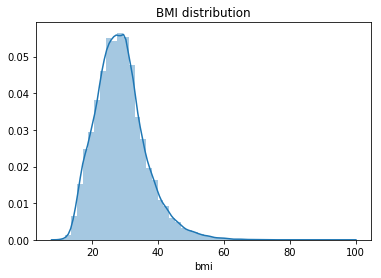

In [30]:
_ = sns.distplot(data.bmi)
_ = plt.title('BMI distribution')
data.bmi.describe()

We see the smooth distribution which resembles the original

**Correlations**

In [31]:
valid_rows['bmi'].corr(valid_rows['avg_glucose_level']),valid_rows['bmi'].corr(valid_rows['age'])

(0.19279240836754266, 0.3611044823478155)

** Some numerical EDAs to quench my curiosity**

In [32]:
pd.DataFrame(train.groupby('gender').stroke.value_counts())

stroke
gender stroke        
Female 0        25234
       1          431
Male   0        17372
       1          352
Other  0           11

In [33]:
pd.DataFrame(train.groupby('gender').stroke.value_counts()*100/train.groupby('gender').stroke.count())

stroke
gender stroke            
Female 0        98.320670
       1         1.679330
Male   0        98.013992
       1         1.986008
Other  0       100.000000

In [34]:
print("Stroke probability by smoking status")
pd.DataFrame(train.groupby('smoking_status').stroke.value_counts()*100/train.groupby('smoking_status').stroke.count())

Stroke probability by smoking status


stroke
smoking_status  stroke           
formerly smoked 0       96.940753
                1        3.059247
never smoked    0       98.753432
                1        1.246568
smokes          0       97.916993
                1        2.083007

In [35]:
pd.DataFrame(train.groupby('work_type').stroke.value_counts())

stroke
work_type     stroke        
Govt_job      0         5351
              1           89
Never_worked  0          177
Private       0        24393
              1          441
Self-employed 0         6542
              1          251
children      0         6154
              1            2

In [36]:
print("Percentage of total count of each category")
pd.DataFrame(train.groupby('work_type').stroke.value_counts()*100/train.groupby('work_type').stroke.count())

Percentage of total count of each category


stroke
work_type     stroke            
Govt_job      0        98.363971
              1         1.636029
Never_worked  0       100.000000
Private       0        98.224209
              1         1.775791
Self-employed 0        96.305020
              1         3.694980
children      0        99.967511
              1         0.032489

## Predictive Modeling

**First Question:** Which model to use?        
**Answer:** Almost all cases, try plain logistic regression first
    

In [37]:
# Import Machine learning libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score 
from sklearn.metrics import average_precision_score,f1_score,roc_curve,auc
from sklearn.model_selection import cross_val_score
from sklearn.grid_search import GridSearchCV

#------------------------------------------------------------------------------#
# Function to plot ROC and find area under ROC                                 #
#------------------------------------------------------------------------------#
def find_auc_score(clf,Xin,yin,color='g',name='LogReg',label=1,prob=1) :
    '''Function to plot Receiver characteristics and find AUC'''
    if prob == 1:
        yscore = clf.predict_proba(Xin)
    else :
        yscore = clf.decision_function(Xin)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(yin, yscore[:,label],pos_label=label)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate,color ,label='AUC '+name+' = %0.6f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    return roc_auc

def cv_optimize(clf, parameters, X, y, n_jobs=1, n_folds=5, score_func=None):
    if score_func:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, n_jobs=n_jobs, scoring=score_func)
    else:
        gs = GridSearchCV(clf, param_grid=parameters, n_jobs=n_jobs, cv=n_folds)
    gs.fit(X, y)
    print("BEST", gs.best_params_, gs.best_score_, gs.grid_scores_)
    best = gs.best_estimator_
    return best

def pre_process_Xy(Xarray,yarray,test_dev_split_size=0.2) :
    '''Function to split given data into test and (train, dev) set'''
    Xtr,Xdev,ytr,ydev = train_test_split(Xarray,yarray,test_size=test_dev_split_size,random_state=42,stratify=yarray)
    return Xtr,Xdev,ytr,ydev

def do_classify(clf, parameters, Xtr,ytr,Xdev,ydev, score_func='roc_auc', n_folds=5, n_jobs=2,model_name='LogReg',label=1,prob_dec=1,print_detail=1):

    if parameters:
        clf = cv_optimize(clf, parameters, Xtr, ytr, n_jobs=n_jobs, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtr, ytr)
    training_accuracy = clf.score(Xtr, ytr)
    test_accuracy = clf.score(Xdev, ydev)
    ypred =  clf.predict(Xdev)
    find_auc_score(clf,Xtr,ytr,color='orange',name=model_name+"_Train",label=1,prob=1)
    find_auc_score(clf,Xdev,ydev,color='g',name=model_name+"_Dev",label=1,prob=1)
    print("############# " + model_name+" ################")
    print("Accuracy on training data: %0.2f" % (100*training_accuracy)+'%')
    print("Accuracy on test data:     %0.2f" % (100*test_accuracy)+'%')
    if print_detail == 1 :
        print("confusion_matrix on dev data")
        print(confusion_matrix(ydev,ypred))
        print("classification report on dev data")
        print(classification_report(ydev,ypred))
        print("########################################################")
    else :
        print("f1 score:  %0.2f" % f1_score(ydev,ypred,average="weighted"))
    return clf

C:\Users\Aparn\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Aparn\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [38]:
# Generate features
data['former_smoker'] = 0
data.loc[df['smoking_status']=='formerly smoked','former_smoker'] = 1
data['heart_dis_smoke'] = data['heart_disease'] & (data['smoking_status_smokes'] | data['former_smoker'])
data['hyp_tension_smoke'] = data['hypertension'] & (data['smoking_status_smokes'] | data['former_smoker'])

In [39]:
y = train.stroke
X = data.iloc[:train.shape[0],:].drop('id',axis=1)
# Standardization. Remember to do the same with test
X.loc[:,['age','avg_glucose_level', 'bmi']] = X.loc[:,['age','avg_glucose_level', 'bmi']].transform(lambda x: (x - x.mean()) / x.std())

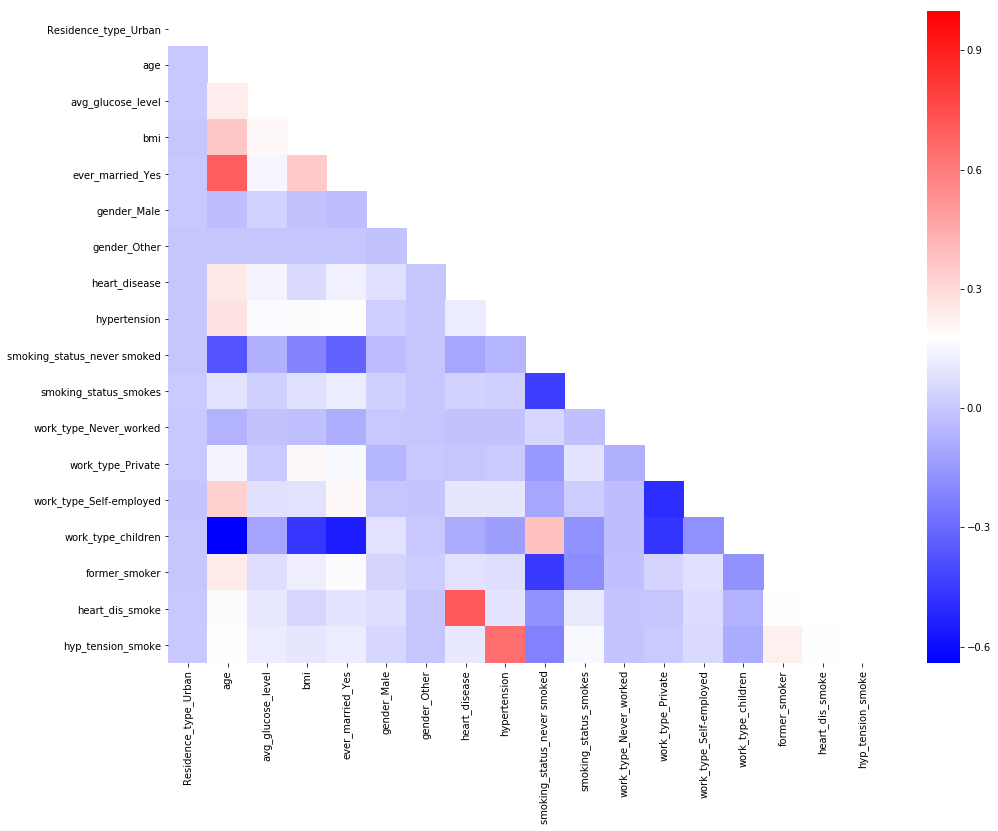

In [40]:
# Plotting correlation for top 10 features
# Ref : https://matplotlib.org/examples/color/colormaps_reference.html for colormap
_ = plt.figure(figsize=(16,12))
mask = np.zeros_like(X.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(X.corr(),mask=mask,cmap='bwr')

Intentionally retained the features with correlations. Dropping them has degraded the performance

In [41]:
X.corr()

,Residence_type_Urban,age,avg_glucose_level,bmi,ever_married_Yes,gender_Male,gender_Other,heart_disease,hypertension,smoking_status_never smoked,smoking_status_smokes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,former_smoker,heart_dis_smoke,hyp_tension_smoke
Residence_type_Urban,1.000000,0.001299,0.000014,-0.003869,0.004422,0.001606,-0.001489,-0.002743,-0.003124,-0.001117,0.009791,0.003089,0.006050,-0.007136,-0.001578,-0.004288,0.001369,0.001558
age,0.001299,1.000000,0.237627,0.363201,0.693070,-0.027603,-0.005168,0.250188,0.272169,-0.371814,0.093665,-0.069509,0.143657,0.326913,-0.641240,0.244646,0.172573,0.176734
avg_glucose_level,0.000014,0.237627,1.000000,0.198846,0.153607,0.035888,-0.005841,0.146938,0.160211,-0.077058,0.029340,-0.014516,0.008048,0.080246,-0.114174,0.075054,0.103088,0.115329
bmi,-0.003869,0.363201,0.198846,1.000000,0.346504,-0.019263,-0.000364,0.060992,0.167741,-0.216079,0.078012,-0.022168,0.203584,0.084600,-0.463478,0.122651,0.044977,0.099599
ever_married_Yes,0.004422,0.693070,0.153607,0.346504,1.000000,-0.030982,-0.006290,0.128833,0.176575,-0.326474,0.121399,-0.080734,0.158857,0.199305,-0.546495,0.172053,0.095895,0.116245
gender_Male,0.001606,-0.027603,0.035888,-0.019263,-0.030982,1.000000,-0.013229,0.082393,0.024070,-0.038091,0.027717,0.002733,-0.052100,-0.002732,0.089076,0.038444,0.076460,0.045163
gender_Other,-0.001489,-0.005168,-0.005841,-0.000364,-0.006290,-0.013229,1.000000,-0.003556,-0.005116,-0.002363,-0.002527,-0.001019,0.002065,-0.006859,0.001824,0.015706,-0.002536,-0.003293
heart_disease,-0.002743,0.250188,0.146938,0.060992,0.128833,0.082393,-0.003556,1.000000,0.119777,-0.104598,0.037806,-0.014292,-0.006327,0.099342,-0.089559,0.083395,0.713229,0.105641
hypertension,-0.003124,0.272169,0.160211,0.167741,0.176575,0.024070,-0.005116,0.119777,1.000000,-0.062575,0.030945,-0.019319,0.007236,0.100243,-0.130171,0.071775,0.090399,0.643656
smoking_status_never smoked,-0.001117,-0.371814,-0.077058,-0.216079,-0.326474,-0.038091,-0.002363,-0.104598,-0.062575,1.000000,-0.439841,0.049562,-0.152376,-0.102907,0.383899,-0.450921,-0.168695,-0.219010


#### Principal Component Analysis
+ Good habit to carry out this in any problem
+ Helps in understanding the separation, in a classification problem
+ If they are well distinguishable in 2-D plane, they are definitely better in higher dimensions.

Percentage Variance: [3.553e+01 1.751e+01 1.374e+01 6.180e+00 5.380e+00 5.070e+00 4.560e+00
 3.220e+00 2.150e+00 1.950e+00 1.530e+00 1.110e+00 8.700e-01 6.100e-01
 3.300e-01 1.700e-01 8.000e-02 1.000e-02]


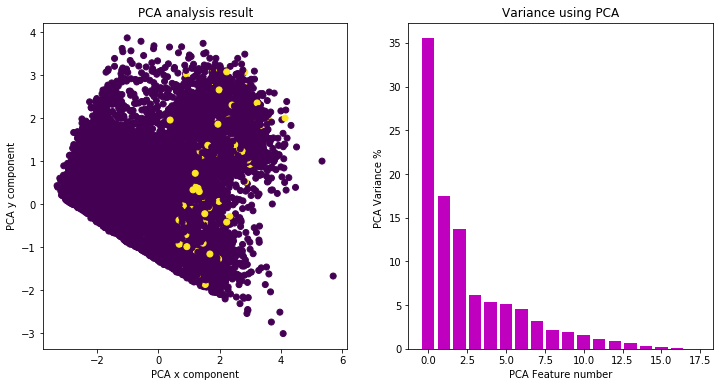

In [42]:
# We will reduce all features to 2D by PCA.
from sklearn.decomposition import PCA
fig = plt.figure(figsize=(12,6))
pca = PCA()
xx = pca.fit_transform(X)
xs = xx[:,0]
ys = xx[:,1]
fig.add_subplot(1,2,1)
_ = plt.scatter(xs,ys,c=y)
_ = plt.title('PCA analysis result')
_ = plt.xlabel("PCA x component")
_ = plt.ylabel("PCA y component")
fig.add_subplot(1,2,2)
_ = plt.bar(np.arange(pca.n_components_),100*np.round(pca.explained_variance_ratio_,4),color='m')
_ = plt.xlabel("PCA Feature number")
_ = plt.ylabel("PCA Variance % ")
_ = plt.title('Variance using PCA')
print("Percentage Variance:",100*np.round(pca.explained_variance_ratio_,4))

+ In the first plot, purple dots are stroke samples, yellow non stroke. They are randomly in touch with each other. But this does not mean they are not separable. This plot is a 2 dimensional approximation, which is highly limited.
+ In the second plot, elbow appears to be at 3 features. Upto 7-8 features have non-negligible information.
+ The PCA analysis gives number of features and their information levels (captured by variance), does not give the feature names.

#### Understanding the evaluation metric AUC-ROC

+ Expansion: Area Under the Curve - Receiver Operating Characteristics.
+ Valid range: 0 to 1.0   

+ Simplest Definition I have found: "It is simply the probability of a randomly chosen positive data point has a higher ranking than a randomly chosen negative data point." Source: Datacamp XGBoost course, ranking here means a score assigned to that point by the classifier. Most often it is a probability number indicating probability that, that data point is 1.

+ x axis: False positive rate (FP)
+ y axis: True positive rate (TP)
+ Points on the ROC are (FP,TP) for a certain threshold T. If a score < T, that point is labeled 0, else 1. FP means 0 is classified as 1. TP means 1 is classified as 1. 
+ Area under the curve: Area to the right and bottom of the curve (FP,TP) for all thresholds from 0 to 1.

**Note:** This is a complicated metric. Please study more and understand how it is plotted by sci-kit learn package.

##### Splitting into Train and development set

In [43]:
Xtrain, Xdev, ytrain,ydev = train_test_split(X,y,test_size=0.2,random_state=123,stratify=y)

##### Logistic Regression

############# LogReg ################
Accuracy on training data: 98.20%
Accuracy on test data:     98.19%
confusion_matrix on dev data
[[8523    0]
 [ 157    0]]
classification report on dev data
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      8523
          1       0.00      0.00      0.00       157

avg / total       0.96      0.98      0.97      8680

########################################################


C:\Users\Aparn\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


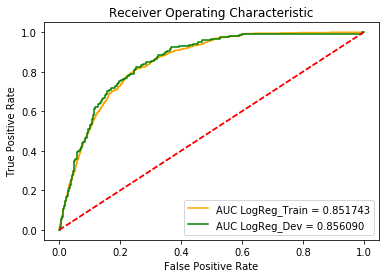

In [44]:
# A plain logistic Regression model would yield:
logreg  = do_classify(LogisticRegression(), None, Xtrain,ytrain,Xdev,ydev, score_func=None, n_folds=5, n_jobs=2,label=1,prob_dec=1)

+ Note the accuracy! > 98%
+ Note the AUC ROC! > 0.8
+ By the books, they are considered to be good. But is this classifier effective? 
+ Note the classification report and confusion matrix. There are no stroke labels identified. This is due to default threshold of 0.5

**Solution is hyperparameter tuning, and class weight balancing**

BEST {'C': 0.01, 'class_weight': 'balanced'} 0.848005408143515 [mean: 0.84636, std: 0.01752, params: {'C': 0.001, 'class_weight': 'balanced'}, mean: 0.84801, std: 0.01944, params: {'C': 0.01, 'class_weight': 'balanced'}, mean: 0.84764, std: 0.02018, params: {'C': 0.1, 'class_weight': 'balanced'}, mean: 0.84755, std: 0.02029, params: {'C': 1, 'class_weight': 'balanced'}]
############# LogReg ################
Accuracy on training data: 73.50%
Accuracy on test data:     73.26%
confusion_matrix on dev data
[[6227 2296]
 [  25  132]]
classification report on dev data
             precision    recall  f1-score   support

          0       1.00      0.73      0.84      8523
          1       0.05      0.84      0.10       157

avg / total       0.98      0.73      0.83      8680

########################################################
Wall time: 2.44 s


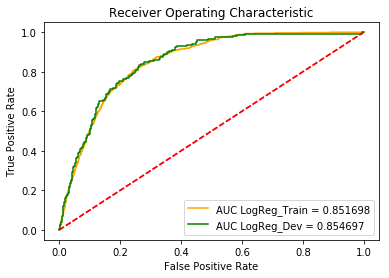

In [45]:
%%time
parameters = {"C": [0.001,0.01,0.1,1],"class_weight":['balanced']}  #Defaults are C=1 and class weight = None
logreg  = do_classify(LogisticRegression(), parameters, Xtrain,ytrain,Xdev,ydev, score_func='roc_auc', n_folds=5, n_jobs=2,label=1,prob_dec=1)

**The results are reliable because orange and green curves are together.**

Accuracy numbers are lower at 73%, but it is fine. (Why!)

In [46]:
submit_data = data.iloc[train.shape[0]:,:]
print(submit_data.info())
# Standardization on test data.
submit_data[['age','avg_glucose_level', 'bmi']] = submit_data[['age','avg_glucose_level', 'bmi']].transform(lambda x: (x - x.mean()) / x.std())
ypred = logreg.predict_proba(submit_data.drop('id',axis=1))
submit_data = submit_data.assign(stroke = ypred[:,1])
submit_data[['id','stroke']].to_csv('aparna_submit.csv',index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18601 entries, 0 to 18600
Data columns (total 19 columns):
Residence_type_Urban           18601 non-null uint8
age                            18601 non-null float64
avg_glucose_level              18601 non-null float64
bmi                            18601 non-null float64
ever_married_Yes               18601 non-null uint8
gender_Male                    18601 non-null uint8
gender_Other                   18601 non-null uint8
heart_disease                  18601 non-null int64
hypertension                   18601 non-null int64
id                             18601 non-null int64
smoking_status_never smoked    18601 non-null uint8
smoking_status_smokes          18601 non-null uint8
work_type_Never_worked         18601 non-null uint8
work_type_Private              18601 non-null uint8
work_type_Self-employed        18601 non-null uint8
work_type_children             18601 non-null uint8
former_smoker                  18601 non-null int64
h

C:\Users\Aparn\Anaconda3\lib\site-packages\pandas\core\frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


#### CrossChecking by seeing distributions

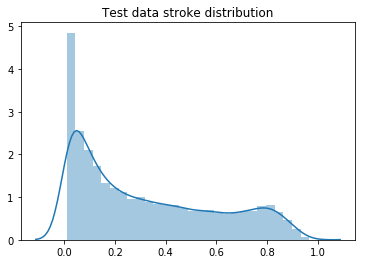

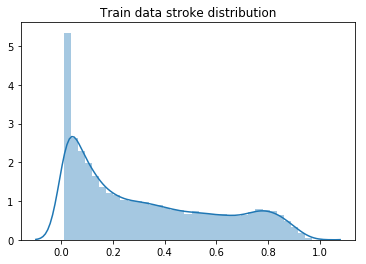

In [47]:
_ = sns.distplot(ypred[:,1])
_ = plt.title('Test data stroke distribution')
_ = plt.figure()
_ = train_pr = logreg.predict_proba(Xtrain)
_ = sns.distplot(train_pr[:,1])
_ = plt.title('Train data stroke distribution')

#### Feature importance and interpretation. 

,Coeff value
age,1.580
heart_disease,0.445
hypertension,0.378
smoking_status_never smoked,-0.249
heart_dis_smoke,0.245
avg_glucose_level,0.189
work_type_children,-0.188
ever_married_Yes,-0.182
smoking_status_smokes,0.150
work_type_Self-employed,0.122


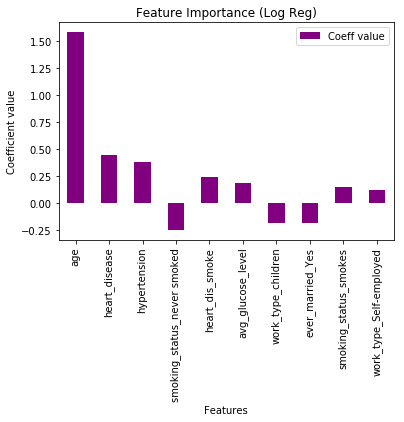

In [48]:
coeff=logreg.coef_
intercept = logreg.intercept_
coeffs_b= logreg.coef_[0,np.argsort(abs(logreg.coef_[0,:]))[::-1]]
names_b = list(X.columns[np.argsort(abs(logreg.coef_[0,:]))[::-1]])
logfimp = pd.DataFrame(np.round(coeffs_b,3),index=names_b,columns=['Coeff value'])
_ = logfimp.head(10).plot.bar(color='purple')
_ = plt.title('Feature Importance (Log Reg)')
_ = plt.ylabel('Coefficient value')
_ = plt.xlabel('Features')
logfimp

**The number of features with high feature importance agrees with the findings of PCA. Only 7 of them are significant**

**Interpretation of Coefficients:** When there is multicollinearity, interpretation is not always exact and reliable, but in this case, age is clearly a dominating feature and related to only 2 other features. Hence I will just give an example of interpretation.          
p(x) = 1/(1+e(-theta(x))), where theta(x) = intercept + coeff_age \* age + coeff_heart_disease \* heart_disease + ......
For a moment, suppose all others are zero, including intercept.
p(x) = 1/(1+e(-coeff_age \* age)), As age increases, exp factor decreases and probability increases. But the amount of increase is dependent on age and hence we can only quantify it at a given age. 
As proven medically and also seen with EDA, we note that in the stroke group, there are high number of aged people. Hence Logistic regression would model this age factor better than any other model.

##### Random Forest 

Looking at the results from Logistic Regression, we should not even be trying anymore. Why?
The Ensemble methods work based on averaging principle. Each tree picks up a random subset of features and predicts. Majority votes from the number of trees as in n_estimators is taken and predictions are made. There are not enough number of feaures here. It is given below to demonstrate the complexity. 

"If a low variance algorithm gives good performance, it is often hard to beat it with high variance models" - not a verbatim quote, but something similar said by Andrew Ng and in Introduction to Statistical Learning Book.

############# RandomForest ################
Accuracy on training data: 98.21%
Accuracy on test data:     98.19%
confusion_matrix on dev data
[[8523    0]
 [ 157    0]]
classification report on dev data
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      8523
          1       0.00      0.00      0.00       157

avg / total       0.96      0.98      0.97      8680

########################################################
Wall time: 3.98 s


C:\Users\Aparn\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


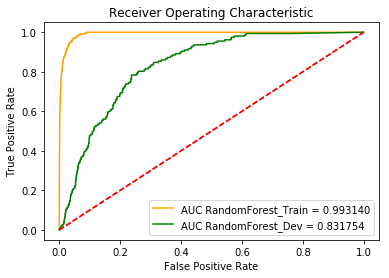

In [49]:
%%time
# Removed parameters because it takes a long time. Replace second argument None in the do_classify call by parameters.
parameters = {"max_depth": [6,8,12,None], 'min_samples_leaf': [2,4,6],"n_estimators":[11,51,101],"class_weight":['balanced']}
rf = do_classify(RandomForestClassifier(max_depth=12,min_samples_leaf=4,max_features=10,n_estimators=101), None, Xtrain,ytrain,Xdev,ydev, score_func='roc_auc', n_folds=5, n_jobs=2,model_name='RandomForest',label=1,prob_dec=1)

**Remark:** This model is **not able to** beat the **null rate** - The null rate results from simply classifying each observation to the dominant class overall, which is in this case the nonstroke class
In other words, recall on positive class is 0 in RF, despite having class weight. We are interested in AUC here, which is high enough, but there is a huge gap between the two curves. If we get the probabilities and set threshold other than 0.5, we will get a non-zero recall value.

,Feature importance
avg_glucose_level,0.304049
bmi,0.262419
age,0.211691
Residence_type_Urban,0.029696
gender_Male,0.026668
heart_disease,0.023589
work_type_Self-employed,0.019987
work_type_Private,0.019223
smoking_status_never smoked,0.018934
hypertension,0.018895


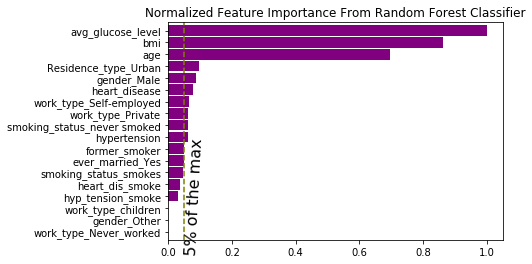

In [50]:
feature_labels = np.array(list(Xtrain.columns))
(pd.Series(rf.feature_importances_,index=feature_labels).sort_values(ascending=True)/np.max(rf.feature_importances_)).plot.barh(color='purple',width=0.9)
_ = plt.title('Normalized Feature Importance From Random Forest Classifier')
_ = plt.axvline(0.05,linestyle='--',color='olive')
_ = plt.text(0.05,7,'5% of the max',rotation=87,fontsize=16)
pd.DataFrame(rf.feature_importances_,index=feature_labels,columns=['Feature importance']).sort_values('Feature importance',ascending=False)

**Remarks:** The importance of features might differ from logistic regression. It is not very simple to explain. The collinearity among features is better handled by tree models. I would rely more on Random Forest for feature importance.

In [51]:
ypred = rf.predict_proba(submit_data.drop(['id','stroke'],axis=1))
submit_data = submit_data.assign(stroke = ypred[:,1])
submit_data[['id','stroke']].to_csv('aparna_submit_rf.csv',index=False)

##### Extreme Gradient Boosting
This method works well if there are a lot of features and many number of samples (like > 100000). It is a package written C and having various APIs. Its installation is a bit difficult. If nothing works, a precompiled version called .whl file for that specific type of operating system will work. Hence, do not pay much attention to this, until you are done with learning all others. The reason for introducing here:

+ XGBoost is state of the art machine learning algorithm in industry. It works well when there are at least a few numerical features
+ It is widely used in winning solutions of kaggle competitions.
+ Although it is not as widely known as deep learning, it can be used with such huge datasets where we tend to use deep learning, and it can give better performance, faster. In other words, it can give nice competition to deep learning networks.

             precision    recall  f1-score   support

          0       0.98      1.00      0.99      8523
          1       0.00      0.00      0.00       157

avg / total       0.96      0.98      0.97      8680

Wall time: 2.82 s


C:\Users\Aparn\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


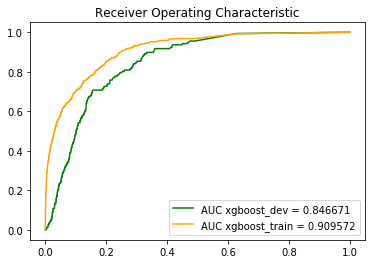

In [52]:
%%time
stroke_matrix = xgb.DMatrix(Xtrain,ytrain)
params = {"objective":"binary:logistic","max_depth":7,'eta':1, 'silent':1,'eval_metric':'auc','learning_rate':.05}
cv_results = xgb.cv(dtrain=stroke_matrix,params=params,nfold=4,num_boost_round=50,metrics="auc",as_pandas=True)
trained_xgb = xgb.train(params,stroke_matrix,num_boost_round=50)
ypred_xgb=trained_xgb.predict(xgb.DMatrix(Xdev))
ypred_xgb_bin = ypred_xgb >= 0.5
false_positive_rate, true_positive_rate, thresholds = roc_curve(ydev, ypred_xgb,pos_label=1)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate,'g' ,label='AUC '+"xgboost_dev"+' = %0.6f'% roc_auc)
false_positive_rate, true_positive_rate, thresholds = roc_curve(ytrain, trained_xgb.predict(xgb.DMatrix(Xtrain)),pos_label=1)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate, true_positive_rate,'orange' ,label='AUC '+"xgboost_train"+' = %0.6f'% roc_auc)
plt.legend(loc='lower right')
print(classification_report(ydev,ypred_xgb_bin))

Note once again that at threshold 0.5, no positive labels are detected.     
**The easiest interpretation is, the probability of positive label is 0.018 as observed in train data. Hence at 0.5 and above there will be none**

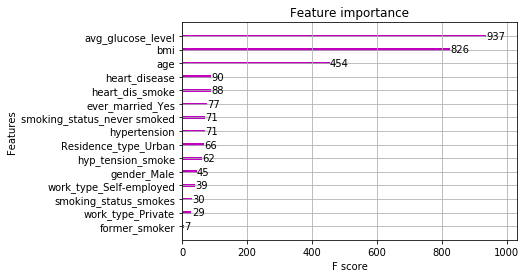

In [53]:
# By default plot_importance plots by "weight" as second argument. Other options are cover and gain
_ = xgb.plot_importance(trained_xgb,color='m')

### What did I do well

+ Took constant breaks and thought about the problem on and off rather than spending all my time in front of computer
+ I am in US Pacific time zone. Contest started at 5pm for me, and I slept by 10pm, got up around 7am. Started working again at 9am after having relaxed breakfast and family time. My final solution was the one submitted within the first 5 hours, just with more comments and detailed EDA. I literally applied the lesson learnt from first hackathon: Having enough rest is the most important factor to do well.

As for the approach:      
+ Got into getting domain knowledge immediately. First read mayoclinic article which is the most trustworthy one and then researched a bit on those factors not mentioned there. Mayoclinic post was useful, others were not super useful, but it is better to have the confidence of exploring enough.
+ Tried a commonsense baseline (not shown in the notebook), of predicting the probabilities based solely on aggregate based on age. Luckily test set did not have a new age number, or else this was not easy. This itself gave AUC number 0.81+, hence I got a reference.
+ Used linear regression to fill missing bmi. Imputing with mean and median changed the distribution.
+ Substituted smoking status of children below 10 by  never smoked (as they were all unknown)
+ Tried logistic regression with 5 fold CV and hyperparameters all at once. Kept a dev set which was not part of this 5 fold cross validation. 
+ Found that BMI did not show much difference, but kept it, as it is an indicator of obesity and medically the weight is very big determinant of stroke probability
+ Did some age rangewise EDA, got some intuition
+ Plotted PCA, feature importance and did all kinds of cross verification.

Finally I felt accomplished despite getting a public score of 0.829 and 182nd rank, because I approached this like a Data Scientist. I had a pleasant surprise when private leaderboard score was 0.858 and position was 22nd!!!

Main Lesson, as heard often from others in competition as well:

**Trust the Cross validation scores more than the leaderboard scores**


### Methods that did not work:

+ Tried kNN with several neighbors option, gave only about 0.71
+ Tried SVM, even though classes were not separable. SVM would generally work when classes are well separated. Still wanted to crosscheck. As expected, ROC curve was not even convex. It was having crazy random pattern around the straight line joining  (0,0) and (1,1)
+ The scale of probabilities found with xgboost and logistic regressions were different. First brought them to same scale and then applied some weightage, 0.6logreg_prob + 0.4xgboost_prob to find the weighted probabilities and checked the score. It did not improve the score on public leaderboard. Hence did not want to risk with a method which is not logically convincing. Besides there is no straightforward equivalent option of class_weight argument that is present in logreg and Random Forest. This is absent even in gradient boosting algorithm which is the mother of extreme gradient boosting

### What I could have done better:
+ Should have paid more attention to leverage points (points which are far away from mean - they are outliers among features) and removed those which are not present in test data.
+ Should have filled those remaining 20% smoking status. (did only for the children, which was around 10% out of 30% missing)
+ Should have taken some risks and gone with my gut feeling and analysis (a)of dropping irrelevant feature like residence type and b) assigning weights to smoking status instead of one hot encoding - top 2 among many) even though it gave slightly less score in public LB. After all I was doing this to gain more experience and not for the rank. But it is hard to do!Especially when rank matters to put in your resume
+ Could have done binning on age, average glucose level (thought about these but didnt even try)
+ Read about catboost recently, but did not try. It was worth trying because many others tried it and got good results.
+ One thing that never occured to me is trying xgboost with linear base learner.
+ Should have tried combining results from random forest and logreg in a sensible way. I only tried with xgboost
+ Could have tried L1 penalty too on log reg, it would have automatically dropped irrelevent features
+ Never tried hyperparameter tuning on xgboost. Since logreg gave good results, xgboost seemed like overkill and I still feel I am right. This is something that I am yet to understand. Everyone seems excited about using it even though logistic regression can do the same job.

### Why did I not try Sampling methods or SMOTE

+ I did read SMOTE paper a few days ago and I get the idea. They recommend using it along with undersampling majority class.
+ I am not convinced that it is widely practiced in industry. I am not sure of its usefulness to the current problem. Did not prioritize it over other things and studied when it should be applied.
+ When I don't have clarity, I am not comfortable using it just because it could give results. There is a package imblearn and I was surprised recently that one of the practicing data scientists heard about it from me.
+ One more experienced data scientist (PhD, > 5 yrs experience) indicated that whenever possible, she would try not to use these methods, and try to keep train and test distributions same.
+ My Springboard mentor who is a PhD with 7+ yrs of DS experience did not recommend any of the sampling methods to my moderately imbalanced classification problems (70:15:15 - 3 class problem) and said that these methods bias the model. Unless we are dealing with huge imbalance like < 1% positive labels we may not want to use it, especially when there are enough number of positive labels to learn from. 
+ I think ratio of number of features Vs number of samples matters. With lower number of features, that too very few numerical features, SMOTE can not generate too many different new samples. After all, it is some weighted combination of other samples of positive labels. Hence I have my own doubts of its usefulness in the current problem.

Please feel free to comment here and follow me on twitter @aparsha2303 for quick updates on my work.

## Takeaways :

+ Biases in data
+ Attributes related to this problem
+ Missing data handling, dangers of imputing with mean
+ Exploratory Data Analysis - visual and numerical
+ Feature Engineering - generating additional features from existing
+ Standardization for bringing all numeric values to same range
+ Logistic Regression
+ Principal Component Analysis
+ Kfold cross validation, with k=5
+ Hyperparameter Tuning
+ Class weight balancing
+ Random Forests
+ Surface level Extreme Gradient Boosting
+ Getting feature importance.
+ Hackathon tips.

We did not cover many concepts like details of the metrics, suitability of AUC-ROC for this problem, choosing different penalty, feature selection methods, interval features (converting age to bins for example) etc. 

### References
+ Introduction to Statistical Learning
+ CS109 2015 Harvard course Lectures and exercises
+ Coursera Machine Learning by Andrew Ng
+ Some Datacamp material
+ Stackoverflow, other people GitHub repos, KDNuggets, TowardsDataScience, LinkedIn, Twitter content
+ Slack channel for Hackathon